In [3]:
import pandas as pd
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [4]:
filename = r'C:\Users\Jessica\Downloads\consulta_cand_2020\consulta_cand_2020_ES.csv'
df = pd.read_csv(filename, delimiter=';', 
                 usecols='DS_CARGO CD_CARGO DS_SITUACAO_CANDIDATURA SG_PARTIDO CD_GENERO DS_GENERO CD_COR_RACA DS_COR_RACA VR_DESPESA_MAX_CAMPANHA ST_REELEICAO'.split(),
                 encoding='ISO-8859-1',
                 error_bad_lines=False)

In [4]:
df.shape

(12589, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12589 entries, 0 to 12588
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CD_CARGO                 12589 non-null  int64 
 1   DS_CARGO                 12589 non-null  object
 2   DS_SITUACAO_CANDIDATURA  12589 non-null  object
 3   SG_PARTIDO               12589 non-null  object
 4   CD_GENERO                12589 non-null  int64 
 5   DS_GENERO                12589 non-null  object
 6   CD_COR_RACA              12589 non-null  int64 
 7   DS_COR_RACA              12589 non-null  object
 8   VR_DESPESA_MAX_CAMPANHA  12589 non-null  int64 
 9   ST_REELEICAO             12589 non-null  object
dtypes: int64(4), object(6)
memory usage: 983.6+ KB


In [6]:
for par in enumerate(df.columns): print (par)

(0, 'CD_CARGO')
(1, 'DS_CARGO')
(2, 'DS_SITUACAO_CANDIDATURA')
(3, 'SG_PARTIDO')
(4, 'CD_GENERO')
(5, 'DS_GENERO')
(6, 'CD_COR_RACA')
(7, 'DS_COR_RACA')
(8, 'VR_DESPESA_MAX_CAMPANHA')
(9, 'ST_REELEICAO')


In [7]:
df.sample(10)

,CD_CARGO,DS_CARGO,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO
4395,13,VEREADOR,APTO,DEM,4,FEMININO,1,BRANCA,12308,N
7237,13,VEREADOR,APTO,PP,2,MASCULINO,3,PARDA,46136,N
4227,13,VEREADOR,APTO,PSB,4,FEMININO,1,BRANCA,20446,N
8716,13,VEREADOR,INAPTO,PATRIOTA,2,MASCULINO,3,PARDA,100725,N
1777,13,VEREADOR,APTO,PV,4,FEMININO,1,BRANCA,24479,N
4334,13,VEREADOR,APTO,PT,2,MASCULINO,1,BRANCA,25489,N
8693,13,VEREADOR,APTO,PSDB,2,MASCULINO,3,PARDA,102310,N
12427,13,VEREADOR,APTO,SOLIDARIEDADE,2,MASCULINO,3,PARDA,102310,N
7443,13,VEREADOR,APTO,PODE,2,MASCULINO,3,PARDA,89004,N
6068,13,VEREADOR,APTO,PTC,4,FEMININO,3,PARDA,88973,N


De acordo com os dados da matéria da BBC [Direita ou esquerda? Análise de votações indica posição de partidos brasileiros no espectro ideológico](https://www.bbc.com/portuguese/brasil-41058120) de 2017, será a base nessa análise os partidos definidos de cada posição.

In [5]:
partidos_esquerda = ['PDT', 'PTDOB', 'PCDOB', 'PT', 'PROS', 'PSB', 'REDE', 'PSOL']
partidos_direita = ['PSL', 'PRP', 'PR', 'PRB', 'PMDB', 'PTB', 'PP', 'DEM', 'SD', 'PSD', 'PHS', 'PODE', 'PSC', 'PSDB', 'PEN', 'PPS', 'PV']

In [15]:
print(partidos_direita)

['PSL', 'PRP', 'PR', 'PRB', 'PMDB', 'PTB', 'PP', 'DEM', 'SD', 'PSD', 'PHS', 'PODE', 'PSC', 'PSDB', 'PEN', 'PPS', 'PV']


<AxesSubplot:ylabel='DS_COR_RACA'>

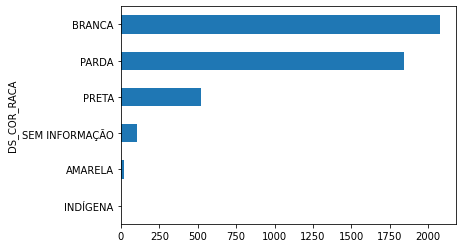

In [10]:
df.query('SG_PARTIDO in @partidos_direita and DS_SITUACAO_CANDIDATURA == "APTO" and ST_REELEICAO == "N"').groupby('DS_COR_RACA').size().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='DS_COR_RACA'>

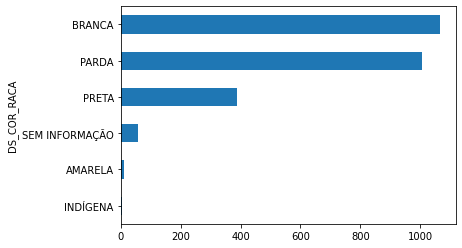

In [11]:
df.query('SG_PARTIDO in @partidos_esquerda and DS_SITUACAO_CANDIDATURA == "APTO" and ST_REELEICAO == "N"').groupby('DS_COR_RACA').size().sort_values().plot(kind='barh')

<AxesSubplot:ylabel='None'>

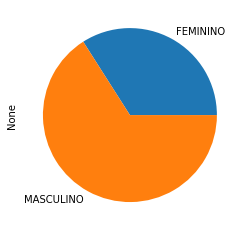

In [12]:
df.query('DS_SITUACAO_CANDIDATURA == "APTO" and SG_PARTIDO in @partidos_direita and ST_REELEICAO == "N"').groupby('DS_GENERO').size().sort_values().plot(kind='pie')

<AxesSubplot:ylabel='None'>

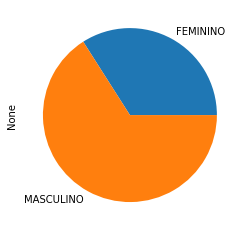

In [13]:
df.query('DS_SITUACAO_CANDIDATURA == "APTO" and SG_PARTIDO in @partidos_direita and ST_REELEICAO == "N"').groupby('DS_GENERO').size().sort_values().plot(kind='pie')